# Salary prediction - ML Project

### Задание

1. Загрузите датасет с резюме программистов и проведите предварительный анализ данных. Включите в анализ следующие шаги:
   a. Ознакомьтесь с общей структурой и содержанием данных.
   b. Проверьте наличие пропущенных значений и решите, как с ними работать.
   c. Изучите распределение данных в различных атрибутах (например, опыт работы, образование и т.д.)

2. Проведите предобработку данных:
   a. Примените необходимые методы для обработки пропущенных значений.
   b. Создайте новые признаки (при необходимости).

3. Прогнозирование: Создайте модель прогнозирования, которая будет предсказать уровень желаемой зарплаты (столбец salary в датасет).

4. Проведите анализ полученных результатов:
   a. Оцените качество модели машинного обучения по выбранным метрикам.
   b. Сделайте выводы о том какие факторы обладают наибольшим влиянием на уровень зарплаты.

5. Подготовьте отчет или Jupyter Notebook, демонстрирующий ваш код, результаты и выводы.


### Assignment

1. Load a dataset with programmers' resumes and perform a preliminary analysis of the data. Include the following steps in the analysis:
   a. Familiarize yourself with the overall structure and content of the data.
   b. Check for missing values and decide how to handle them.
   c. Examine the distribution of data in different attributes (e.g., work experience, education, etc.)

2. Do some preprocessing of the data:
   a. Apply the necessary methods to handle missing values.
   b. Create new features (if necessary).

3. Prediction: Create a prediction model that will predict the level of desired salary (salary column in the dataset).

4. Analyze the results obtained:
   a. Evaluate the quality of the machine learning model using the selected metrics.
   b. Draw conclusions about which factors have the greatest influence on the level of wages.

5. Prepare a report or Jupyter Notebook showing your code, results, and conclusions.

## Installing modules and reading the data

In [458]:
#libraries
import chardet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import xgboost as xgb
import category_encoders as ce
from statsmodels.stats.outliers_influence import variance_inflation_factor
import shap
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [459]:
#load the data and look at it
with open('/Users/egor/Downloads/cv_programmers.csv', 'rb') as f:
    enc = chardet.detect(f.read())
    
data = pd.read_csv('/Users/egor/Downloads/cv_programmers.csv', index_col=None, encoding = enc['encoding'])
data = data.drop('Unnamed: 0', axis = 1)

data.sample(5)

,id,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,state_region_code,regionNameTerm,position_name,date_create,date_modify,home_city_code,education,academic_degree,drive_license,code_country,nark_inspection_status,nark_certificate,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,publication_period,rf_citizen,status,visibility,code_external_system,deleted,fullness_rate,professionList,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
71,1192ded0-eefc-11ec-a466-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,6600000000000,NaN,Программист-(Junior-C#-разработчик),2022-06-18T14:44:53+0300,2022-06-21T14:13:16+0300,6600000400000,Высшее,NaN,['B'],RU,NOT_APPLICABLE,NaN,2022-06-28T13:50:33+0300,Полный-рабочий-день,1,40000,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,653539a0-389d-11eb-af3b-736ab11edb0c,NaN,Готов-к-переобучению,NaN,64337530-8d65-11ec-9a3f-195c1cfba751,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,77,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""МАУК ДО ДМШ №7"", ""date_from...","[{""graduate_year"": 2019, ""institute_name"": ""«У...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...","[{""hard_skill_name"": ""знание английского языка...","[{""owner_id"": ""1192ded0-eefc-11ec-a466-839f0d9...","Свердловская-область,-г.-Верхняя-Пышма"
321,18bcb180-88aa-11ec-b12e-1b29d3b53cbb,UNKNOWN,False,NOT_APPLICABLE,2800000000000,NaN,программист,2022-02-08T09:41:08+0300,2022-02-08T09:41:08+0300,2801000003300,NaN,NaN,[],RU,NOT_APPLICABLE,NaN,2022-02-08T09:52:03+0300,Полный-рабочий-день,0,35000,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,eb657e00-c736-11ea-bb49-03fd6b4dc11f,NaN,Не-готов-к-переобучению,NaN,f2ee5350-1a4c-11e5-8d85-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,52,"[{""code_professional_sphere"": ""SportsFitnessBe...",[],"[{""owner_id"": ""18bcb180-88aa-11ec-b12e-1b29d3b...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],[],[],[],"Амурская-область,-Сапроново-село"
304,14f27684-133c-11e8-8387-e37b4be0b9ed,UNKNOWN,False,NOT_APPLICABLE,7700000000000,NaN,программист-1С,2018-02-16T20:09:00+0300,2022-10-26T11:21:59+0300,7700000000000,Высшее,NaN,['B'],RU,NOT_APPLICABLE,NaN,2022-10-26T13:23:44+0300,Полный-рабочий-день,13,200000,NaN,NaN,Полная-занятость,Готов-к-командировкам,504b8e80-133a-11e8-8387-e37b4be0b9ed,NaN,Готов-к-переобучению,NaN,1a562d70-7386-11ec-804b-296f7e9e4719,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,76,"[{""code_profession"": ""228243"", ""code_professio...","[{""company_name"": ""ООО"", ""date_from"": ""2010-10...","[{""faculty"": ""Приборостроительный"", ""graduate_...","[{""graduate_year"": 2001, ""name"": ""Upgrade-курс...","[{""owner_id"": ""14f27684-133c-11e8-8387-e37b4be...","[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[],г.-Москва
215,14d530c0-0cc5-11ed-b4c5-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,5500000000000,NaN,Бухгалтер-программист-1С,2022-07-26T12:26:51+0300,2022-07-26T12:26:51+0300,5500000100000,NaN,NaN,[],RU,NOT_APPLICABLE,NaN,2022-07-26T12:28:13+0300,Полный-рабочий-день,0,40000,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,53ca3ec0-0cc4-11ed-8f05-292eaf1c26e0,NaN,Не-готов-к-переобучению,NaN,8d334220-2a5b-11ec-8b68-dbfd80b8ec0d,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,52,"[{""code_profession"": ""203392"", ""code_professio...",[],"[{""owner_id"": ""14d530c0-0cc5-11ed-b4c5-839f0d9...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],[],[],[],"Омская-область,-г.-Омск"
373,036d2bc0-fbc8-11ec-bcb3-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,2300000000000,NaN,программист,2022-07-04T21:35:01+0300,2022

In [460]:
#shape of the data
data.shape

(425, 47)

### Findings:
* There are **NA** values that are written like **'[]'** - variables *'additionalEducationList', 'worldskills'* etc.;
* There are few columns that look like they have **only one** unique value - variables *'deleted', 'publication_period', 'visibility'* etc.;
* There are also some columns that are unnecessary for further analysis since they are **user identifiers** - variables *'id', 'id_candidate', 'id_user'*;
* And there are several columns which values consist of **dictionaries** - it's better to look at each key separately - variables *'professionList', 'workExperienceList', 'educationList'* etc;
* In *'position_name'* variable values may be same in terms of meaning but **different** in terms of writing - I will need to unify them.

## Data cleaning and preprocessing - Part 1
* Here I'm changing data types of some variables;
* Also I'm dealling with NA values - I drop all columns which contain more than 50% of NAs;
* I'm checking the number of unique values in columns and if these values are balanced within the variable - for instance I'm dropping all categorical variables that contain 425 unique values;
* I'm replacing NA values with mode and previous values as well.

In [461]:
#changing '[]' into NAs and getting the information about the data
data = data.replace('[]', np.NaN)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             425 non-null    object 
 1   abilympics_inspection_status   425 non-null    object 
 2   abilympics_participation       425 non-null    bool   
 3   worldskills_inspection_status  425 non-null    object 
 4   state_region_code              425 non-null    int64  
 5   regionNameTerm                 0 non-null      float64
 6   position_name                  425 non-null    object 
 7   date_create                    425 non-null    object 
 8   date_modify                    425 non-null    object 
 9   home_city_code                 425 non-null    int64  
 10  education                      367 non-null    object 
 11  academic_degree                0 non-null      float64
 12  drive_license                  73 non-null     obj

In [462]:
#statistics of numerical variables
data.describe().style.background_gradient()

,state_region_code,regionNameTerm,home_city_code,academic_degree,experience,salary,publication_period,code_external_system,fullness_rate
count,425.000000,0.000000,425.000000,0.000000,425.000000,425.000000,425.000000,0.000000,425.000000
mean,4487058823529.412109,nan,4487465928198.117188,nan,3.296471,46426.835294,0.000000,nan,66.891765
std,2501753547056.719238,nan,2501793014750.081055,nan,6.191642,40432.473215,0.000000,nan,14.335684
min,100000000000.000000,nan,100000200000.000000,nan,0.000000,0.000000,0.000000,nan,0.000000
25%,2300000000000.000000,nan,2300000100000.000000,nan,0.000000,25000.000000,0.000000,nan,61.000000
50%,5000000000000.000000,nan,5000003000000.000000,nan,1.000000,40000.000000,0.000000,nan,67.000000
75%,6600000000000.000000,nan,6600001200000.000000,nan,4.000000,50000.000000,0.000000,nan,75.000000
max,9100000000000.000000,nan,9101200001900.000000,nan,52.000000,350000.000000,0.000000,nan,100.000000


In [463]:
#changing data types of date variables and 'state_region_code' and 'home_city_code' columns, since they specify 
#characteristics, not data for calculations
data1 = data
data1['date_create'] = pd.to_datetime(data1['date_create'])
data1['date_modify'] = pd.to_datetime(data1['date_modify'])
data1['published_date'] = pd.to_datetime(data1['published_date'])

data1['state_region_code'] = data1['state_region_code'].astype(str)
data1['home_city_code'] = data1['home_city_code'].astype(str)

In [464]:
data1.isna().sum()

id                                 0
abilympics_inspection_status       0
abilympics_participation           0
worldskills_inspection_status      0
state_region_code                  0
regionNameTerm                   425
position_name                      0
date_create                        0
date_modify                        0
home_city_code                     0
education                         58
academic_degree                  425
drive_license                    352
code_country                       0
nark_inspection_status             0
nark_certificate                 420
published_date                     4
schedule_type                      0
experience                         0
salary                             0
professional_skills              397
add_skills                       405
busy_type                          0
business_trip                      0
id_candidate                       0
other_certificates               388
retraining_capability              0
o

In [465]:
#dropping variables with more than 50% of NA values
data1 = data1.dropna(axis=1, thresh = data1.shape[0]*0.50)

In [466]:
#dropping categorical variables that have too many unique values and only one unique value 
data1.select_dtypes(include='object').nunique()

id                               425
abilympics_inspection_status       1
worldskills_inspection_status      2
state_region_code                 70
position_name                    123
home_city_code                   259
education                          4
code_country                       2
nark_inspection_status             3
schedule_type                     45
busy_type                          5
business_trip                      2
id_candidate                     424
retraining_capability              2
id_user                          317
status                             2
visibility                         1
professionList                   425
workExperienceList               253
educationList                    421
contactList                      425
languageKnowledge                307
localityName                     259
dtype: int64

In [467]:
data1 = data1.drop(['id',
                    'id_candidate',
                    'id_user',
                    'abilympics_inspection_status',
                    'home_city_code',
                    'visibility',
                    'contactList'], axis=1)

In [468]:
#dropping bool variables with only one unique value
data1.select_dtypes(include='bool').nunique()

abilympics_participation    2
rf_citizen                  2
deleted                     1
dtype: int64

In [469]:
data1 = data1.drop('deleted', axis=1)

In [470]:
#dropping numerical variables with only one unique value
data1.select_dtypes(include=('float', 'int64')).nunique()

experience            29
salary                55
publication_period     1
fullness_rate         50
dtype: int64

In [471]:
data1 = data1.drop('publication_period', axis=1)

In [472]:
#checking number of each unique value and dropping unbalanced bool variables - almost no observations of one class
for col in data1.select_dtypes(include='bool'):
    print(data1[col].value_counts())

False    423
True       2
Name: abilympics_participation, dtype: int64
True     424
False      1
Name: rf_citizen, dtype: int64


In [473]:
data1 = data1.drop(['abilympics_participation', 'rf_citizen'], axis=1)

In [474]:
#checking number of each unique value in numerical variables
for col in data1.select_dtypes(include=('int64', 'float')):
    print(data1[col].value_counts())

0     210
1      50
2      29
3      24
4      22
5      12
8      11
9       8
14      7
7       6
15      5
6       5
12      5
10      4
13      4
11      4
21      3
31      2
20      2
16      2
18      2
22      1
52      1
25      1
24      1
19      1
42      1
29      1
26      1
Name: experience, dtype: int64
30000     56
50000     52
40000     48
20000     41
25000     38
60000     24
35000     24
15000     17
45000     16
70000     16
80000     13
100000    11
150000     5
55000      4
65000      4
200000     4
90000      3
250000     3
18000      2
300000     2
27000      2
75000      2
16000      2
60         2
29999      2
28000      2
22000      2
45571      1
23700      1
12872      1
15279      1
29428      1
5000       1
19000      1
29998      1
32000      1
8500       1
13920      1
350000     1
180000     1
37000      1
12000      1
46000      1
0          1
26000      1
1          1
19990      1
26473      1
63400      1
53000      1
10000      1
24000      1
249

In [475]:
#checking number of each unique value and dropping unbalanced categorical variables
for col in data1.select_dtypes(include='object'):
    if data1[col].value_counts()[0] - data1[col].value_counts()[1] > 300:
        print(data1[col].value_counts())

NOT_APPLICABLE    421
WAITING             4
Name: worldskills_inspection_status, dtype: int64
RU    424
BY      1
Name: code_country, dtype: int64
NOT_APPLICABLE    420
FAILURE             3
WAITING             2
Name: nark_inspection_status, dtype: int64
ACCEPTED    421
REJECTED      4
Name: status, dtype: int64


In [476]:
data1 = data1.drop(['worldskills_inspection_status', 
                    'code_country',
                    'nark_inspection_status',
                    'status'], axis=1)

In [477]:
#checking duplicated values in the data
duplicates = data1[data1.duplicated()]
print(f'There are {duplicates.shape[0]} values in the dataset')

There are 0 values in the dataset


In [478]:
#getting rid of NA values
null_val = data1.isna().sum()
for col in null_val[null_val > 0].index:
    print(f'\n {col} has {null_val[col]} null values')
    print('data type of {} is {}'.format(col, data1[col].dtype))


 education has 58 null values
data type of education is object

 published_date has 4 null values
data type of published_date is datetime64[ns, pytz.FixedOffset(180)]

 workExperienceList has 172 null values
data type of workExperienceList is object

 educationList has 4 null values
data type of educationList is object

 languageKnowledge has 118 null values
data type of languageKnowledge is object


In [479]:
#replacing NAs with mode and previous values
data1['education'].fillna(data1['education'].mode()[0], inplace = True)
data1['published_date'].ffill(inplace = True)

## Data cleaning and preprocessing - Part 2  - Feature Engineering
* Here I'm trying to get useful information (new features) from variables that consist of dictionaries (*workExperienceList, educationList, languageKnowledge, professionList*);
* I'm modifying *datetime* variables and variables that contain several categories (*schedule_type, localityName*);
* I'm modifying *position_name* variable as well, since it has too much unique variables;
* I'm also continuing replacing NAs.

In [480]:
data1.head(3)

,state_region_code,position_name,date_create,date_modify,education,published_date,schedule_type,experience,salary,busy_type,business_trip,retraining_capability,fullness_rate,professionList,workExperienceList,educationList,languageKnowledge,localityName
0,6100000000000,Техник-программист,2021-11-29 21:27:30+03:00,2021-11-29 21:29:16+03:00,Среднее-профессиональное,2021-11-30 10:50:53+03:00,"Сменный-график,Неполный-рабочий-день,Полный-ра...",2,30000,Полная-занятость,Готов-к-командировкам,Готов-к-переобучению,79,"[{""code_profession"": ""270999"", ""code_professio...","[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...","[{""code_language"": ""Английский"", ""level"": ""Чте...","Ростовская-область,-г.-Ростов-на-Дону"
1,7800000000000,Программист,2021-11-01 20:56:17+03:00,2021-11-28 19:12:25+03:00,Среднее,2021-11-28 19:18:18+03:00,"Гибкий-график,Сменный-график,Полный-рабочий-день",14,30000,Полная-занятость,Не-готов-к-командировкам,Готов-к-переобучению,69,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...","[{""code_language"": ""Русский"", ""level"": ""Родной...",г.-Санкт-Петербург
2,5600000000000,Программист,2022-07-28 10:00:49+03:00,2022-07-29 10:30:56+03:00,Среднее,2022-07-29 14:04:11+03:00,"Гибкий-график,Полный-рабочий-день,Вахтовый-метод",0,25000,Удаленная,Не-готов-к-командировкам,Готов-к-переобучению,73,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...","[{""code_language"": ""Французский"", ""level"": ""Ба...","Оренбургская-область,-г.-Медногорск"


In [481]:
#looking at the structure of the columns with dictionaries - finding the longest dictionary in order to look at 
#all possible keys
import ast

for col in data1.columns[-5:-1]:
    num = 0
    row_index = 0
    value_index = 0
    try:
        for i in range(data1.shape[0]):
            if str(data1.loc[i, col]) != 'nan':
                for j in ast.literal_eval(data1.loc[i, col]):
                    if len(j) >= num:
                        num = len(j)
                        row_index = i
                        value_index = ast.literal_eval(data1.loc[i, col]).index(j)
        print(f'{col} column\n {ast.literal_eval(data1.loc[row_index, col])[value_index]}\n')
    except ValueError:
        print(f'ValueError in {col} column\n {data1.loc[1, col]}\n')

professionList column
 {'code_profession': '258573', 'code_professional_sphere': 'InformationTechnology', 'owner_id': '014910a0-0545-11eb-8fbf-03fd6b4dc11f', 'type': 'CandidateProfession'}

ValueError in workExperienceList column
 [{"company_name": "Corbina Telecom", "date_from": "2007-10-01T01:00:00+0400", "date_to": "2011-04-01T01:00:00+0400", "demands": "<p>1. Написание программы в Microsoft Visual C++ 6.0 под Windows, с оконным интерфейсом, для работы пользователей с базой данных.</p>\n<p>2. Работа с техподдержкой.</p>\n<p>3. Исполнение обязанностей сетевого инженера.</p>", "owner_id": "02f6df20-3b3d-11ec-a60c-839f0d9a4379", "position": "Техник оборудования связи", "relevant": false, "type": "WorkExperience"}, {"company_name": "Билайн", "date_from": "2011-05-01T01:00:00+0400", "date_to": "2017-10-01T00:00:00+0300", "demands": "<p>Исполнение обязанностей сетевого инженера:</p>\n<p>1. Работа с техподдержкой.</p>\n<p>2. Настройка сетевого оборудования, в частности, коммутаторов доступ

### Findings:
* From the column *professionList* I'm going to highlight **code_profession** and **code_professional_sphere** as a new variables;
* From the column *educationList* I'm going to highlight **graduate_year** as a new variable, except those, connected with schools;
* From the column *languageKnowledge* I'm going to highlight **the number of languages** that a person knows as a new variable, except russian language;
* And from the column *workExperienceList* I'm going to highlight **the number of work places** that a person has as a new variable. Also I need to get rid of ValueError in this column by replacing *false* with *'false'* in "relevant" key.

In [482]:
data1['workExperienceList'] = data1['workExperienceList'].str.replace("false", "'false'")
ast.literal_eval(str(data1.loc[1, 'workExperienceList']))[0]

{'company_name': 'Corbina Telecom',
 'date_from': '2007-10-01T01:00:00+0400',
 'date_to': '2011-04-01T01:00:00+0400',
 'demands': '<p>1. Написание программы в Microsoft Visual C++ 6.0 под Windows, с оконным интерфейсом, для работы пользователей с базой данных.</p>\n<p>2. Работа с техподдержкой.</p>\n<p>3. Исполнение обязанностей сетевого инженера.</p>',
 'owner_id': '02f6df20-3b3d-11ec-a60c-839f0d9a4379',
 'position': 'Техник оборудования связи',
 'relevant': 'false',
 'type': 'WorkExperience'}

In [483]:
#workExperienceList column - Feature Engineering
data1['workExperienceList_cnt'] = 0

for i in range(data1.shape[0]):
    if str(data1.loc[i,'workExperienceList']) == 'nan':
        continue
    else:
        data1.loc[i,'workExperienceList_cnt'] = len(ast.literal_eval(str(data1.loc[i, 'workExperienceList'])))

In [484]:
#professionList column - Feature Engineering
data1['code_profession'] = 0
data1['professional_sphere'] = 0
            
            
for i in range(data1.shape[0]):
    for j in range(len(ast.literal_eval(data1.loc[i, 'professionList']))):
        if all(x in ast.literal_eval(data1.loc[i, 'professionList'])[j].keys() for x in ('code_profession', 'code_professional_sphere')):
            data1.loc[i,'code_profession'] = ast.literal_eval(data1.loc[i, 'professionList'])[0]['code_profession']
            data1.loc[i,'professional_sphere'] = ast.literal_eval(data1.loc[i, 'professionList'])[0]['code_professional_sphere']

In [485]:
#educationList column - Feature Engineering
data1['year_graduate'] = 0

stop_words = ['школа','мбоу','сош','№']

years_lst = []

for i in range(data1.shape[0]):
    if str(data1.loc[i,'educationList']) == 'nan':
        continue
    else:
        for j in range(len(ast.literal_eval(data1.loc[i, 'educationList']))):
            if all(x in ast.literal_eval(data1.loc[i, 'educationList'])[j].keys() for x in ('graduate_year', 'institute_name')):
                if any([x in ast.literal_eval(data1.loc[i, 'educationList'])[j]['institute_name'].lower() for x in stop_words]) and 'высшая' not in ast.literal_eval(data1.loc[i, 'educationList'])[j]['institute_name'].lower():
                    continue
                else:
                    years_lst.append(ast.literal_eval(data1.loc[i, 'educationList'])[j]['graduate_year'])
                    data1.loc[i,'year_graduate'] = max(years_lst)
                    years_lst.clear()
            else:
                if 'graduate_year' in ast.literal_eval(data1.loc[i, 'educationList'])[j].keys():
                    data1.loc[i,'year_graduate'] = ast.literal_eval(data1.loc[i, 'educationList'])[j]['graduate_year']

In [486]:
#languageKnowledge column - Feature Engineering
data1['language_cnt'] = 0

language_cnt = 0

for i in range(data1.shape[0]):
    if str(data1.loc[i,'languageKnowledge']) == 'nan':
        continue
    else:
        for j in range(len(ast.literal_eval(data1.loc[i, 'languageKnowledge']))):
            if ast.literal_eval(data1.loc[i, 'languageKnowledge'])[j]['code_language'].lower() != 'русский':
                language_cnt += 1
    data1.loc[i,'language_cnt'] = language_cnt
    language_cnt = 0

In [487]:
data1 = data1.drop(['languageKnowledge', 'educationList', 'professionList', 'workExperienceList'], axis = 1)

In [488]:
#localityName column
data2 = pd.DataFrame(data1.iloc[:, 13])
data2['city'] = 0
data2['region'] = 0

for i in range(data2.shape[0]):
    if 'г.' in data2.loc[i, 'localityName'].lower():
        data2.loc[i,'city'] = data2.loc[i, 'localityName'].lower().split('г.-')[1]
    data2.loc[i,'region'] = data2.loc[i, 'localityName'].lower().split(',')[0]
    
data2.head()

,localityName,city,region
0,"Ростовская-область,-г.-Ростов-на-Дону",ростов-на-дону,ростовская-область
1,г.-Санкт-Петербург,санкт-петербург,г.-санкт-петербург
2,"Оренбургская-область,-г.-Медногорск",медногорск,оренбургская-область
3,"Республика-Татарстан,-г.-Казань",казань,республика-татарстан
4,"Орловская-область,-г.-Новосиль",новосиль,орловская-область


In [489]:
data2[['city','region']].nunique()

city      177
region     70
dtype: int64

In [490]:
data1['state_region_code'].nunique()

70

### Findings:
* There are too many unique values in the *city* variable, which means that this column won't be useful in terms of modelling, so I'm not going to use it;
* The number of unique values in the new variable *region* is equal to the number of unique values in *state_region_code* variable, which already exist in the dataset, so I'm not going to use new *region*.

In [491]:
data1 = data1.drop('localityName', axis = 1)

In [492]:
#schedule_type column
types_lst = []
for i in range(data1.shape[0]):
    lst = data1.loc[i,'schedule_type'].split(',')
    for j in lst:
        if j in types_lst:
            continue
        else:
            types_lst.append(j)
types_lst

['Сменный-график',
 'Неполный-рабочий-день',
 'Полный-рабочий-день',
 'Гибкий-график',
 'Вахтовый-метод',
 'Ненормированный-рабочий-день']

In [493]:
for i in range(data1.shape[0]):
    if 'Полный-рабочий-день' in data1.loc[i, 'schedule_type']:
        data1.loc[i,'schedule'] = 'Полный-рабочий-день'
    else:
        data1.loc[i,'schedule'] = 'Неполный-рабочий-день'

In [494]:
data1['schedule'].value_counts()

Полный-рабочий-день      378
Неполный-рабочий-день     47
Name: schedule, dtype: int64

In [495]:
data1 = data1.drop('schedule_type', axis = 1)

### Findings:
* There are six unique categories in *schedule_type* variable, but they are combined in different ways for each row;
* I decided to leave only *Полный-рабочий-день* and *Неполный-рабочий-день* categories.

In [496]:
#date_create, date_modify, published_date and year_graduate columns
import datetime
today = datetime.datetime.today()

data1['date_create'] = data1['date_create'].dt.tz_localize(None)
data1['date_modify'] = data1['date_modify'].dt.tz_localize(None)
data1['published_date'] = data1['published_date'].dt.tz_localize(None)

data1['date_create_month_passed'] = np.round((today-data1['date_create'])/np.timedelta64(1,'M'))
data1['date_modify_month_passed'] = np.round((today-data1['date_modify'])/np.timedelta64(1,'M'))
data1['published_date_month_passed'] = np.round((today-data1['published_date'])/np.timedelta64(1,'M'))

data1 = data1.drop(['date_create', 'date_modify', 'published_date'], axis = 1)


data1['year_graduate'].replace(0, np.nan, inplace=True)
extreme = round(data1['year_graduate'].mean() + 3*data1['year_graduate'].std(),0)
data1['year_graduate'] = data1['year_graduate'].fillna(extreme)
data1['year_graduate_years_passed'] = today.year - data1['year_graduate']

data1 = data1.drop('year_graduate', axis = 1)

### Findings:
* I modified *date_create, date_modify* and *published_date* variables into new variables that contain information about the number of months passed from now;
* I also filled NAs in *year_graduate* variable with the mean of this variable plus 3 std, because NAs here are not random and define observation without information about person's education;
* Then I modified *year_graduate* variable into new variable that contains information about the number of years passed from now.

In [497]:
#position_name column
data1['position_name'].nunique()

123

In [498]:
#unifying values in position_name column
for i in range(data1.shape[0]):
    data1.loc[i,'position_name'] = data1['position_name'][i].split(',')[0]
    
data1['position_name'] = data1['position_name'].str.lower()
data1['position_name'].nunique()

91

In [499]:
#changing values in position_name column according to some patterns in order to get less unique values
jun_words = ['младший', 'стажер', 'стажёр', 'начинающий', 'помощник', 'junior']
one_c_words = ['1c', '1с', 'бухгалтер']
web_words = ['web', 'веб']
sys_words = ['системный', 'сис', 'админ']

for i in range(data1.shape[0]):
    if any([x in data1.loc[i, 'position_name'] for x in jun_words]):
        data1.loc[i,'position_name'] = 'junior-программист'
    elif any([x in data1.loc[i, 'position_name'] for x in one_c_words]):
        data1.loc[i,'position_name'] = '1с-программист'
    elif any([x in data1.loc[i, 'position_name'] for x in web_words]):
        data1.loc[i,'position_name'] = 'web-программист'
    elif any([x in data1.loc[i, 'position_name'] for x in sys_words]):
        data1.loc[i,'position_name'] = 'системный-администратор'
    elif 'java' in data1.loc[i, 'position_name']:
        data1.loc[i,'position_name'] = 'java-программист'
    elif 'python' in data1.loc[i, 'position_name']:
        data1.loc[i,'position_name'] = 'python-программист'
    elif 'чпу' in data1.loc[i, 'position_name']:
        data1.loc[i,'position_name'] = 'чпу-программист'
    elif 'c' in data1.loc[i, 'position_name']:
        data1.loc[i,'position_name'] = 'c-программист'
    elif 'инженер' in data1.loc[i, 'position_name']:
        data1.loc[i,'position_name'] = 'инженер-программист'
    elif 'техник' in data1.loc[i, 'position_name']:
        data1.loc[i,'position_name'] = 'техник-программист'
    else:
        data1.loc[i,'position_name'] = 'программист'
        
data1['position_name'].nunique()

11

In [500]:
data1['position_name'].value_counts()

программист                268
инженер-программист         39
junior-программист          28
техник-программист          26
1с-программист              25
web-программист             13
системный-администратор      8
c-программист                6
python-программист           5
java-программист             4
чпу-программист              3
Name: position_name, dtype: int64

### Findings:
* I modified *position_name* variable according to some patterns (key words) getting less unique values - it's usefull for further analysis, since this factor is categorical, and it's not good to have a lot of unique values, especialy if they are equal by meaning and different only by the way of writting.

In [610]:
#target encoding of categorical variables
cat_col = list(data1.select_dtypes(include='object'))
data1[cat_col] = data1[cat_col].astype(str)

encoder = ce.TargetEncoder(cols = enc_features)
df_encoded = encoder.fit_transform(data1[enc_features], data1['salary'])
df_encoded.head(3)

,state_region_code,position_name,education,busy_type,business_trip,retraining_capability,code_profession,professional_sphere,schedule
0,50076.816791,41239.291880,34797.504042,44262.133929,51729.346696,45038.970037,38323.058471,41837.956750,45411.579365
1,61802.137219,47612.529851,39753.722892,44262.133929,44242.345515,45038.970037,46169.090909,47562.651822,45411.579365
2,43477.552452,47612.529851,39753.722892,66579.069740,44242.345515,45038.970037,46169.090909,47562.651822,45411.579365


In [611]:
df = data1.copy()
df = df.drop(cat_col, axis=1)
df = df.drop('salary', axis=1)

#scaling of the data
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df['salary'] = data1['salary']
df = pd.concat([df_encoded,df],axis=1, join="inner")
df.head(3)

,state_region_code,position_name,education,busy_type,business_trip,retraining_capability,code_profession,professional_sphere,schedule,experience,fullness_rate,workExperienceList_cnt,language_cnt,date_create_month_passed,date_modify_month_passed,published_date_month_passed,year_graduate_years_passed,salary
0,50076.816791,41239.291880,34797.504042,44262.133929,51729.346696,45038.970037,38323.058471,41837.956750,45411.579365,-0.209637,0.845618,0.560273,0.544087,0.359512,1.186231,1.197599,0.346994,30000
1,61802.137219,47612.529851,39753.722892,44262.133929,44242.345515,45038.970037,46169.090909,47562.651822,45411.579365,1.730744,0.147235,1.205574,-0.977209,0.453539,1.186231,1.197599,1.910600,30000
2,43477.552452,47612.529851,39753.722892,66579.069740,44242.345515,45038.970037,46169.090909,47562.651822,45411.579365,-0.533034,0.426588,-0.085028,2.065382,-0.392698,-0.220040,-0.211341,-1.628086,25000


In [612]:
#handling multicollinearity
def vif(df):
    vif = pd.DataFrame()
    vif['features'] = df.columns
    vif['VIF_value'] = ['%f' % variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif

features = df.iloc[:,:-1]
vif(features)

,features,VIF_value
0,state_region_code,75.802958
1,position_name,248.112772
2,education,30.101311
3,busy_type,47.882584
4,business_trip,192.100445
5,retraining_capability,485.194004
6,code_profession,415.863963
7,professional_sphere,491.177290
8,schedule,291.506779
9,experience,1.696163


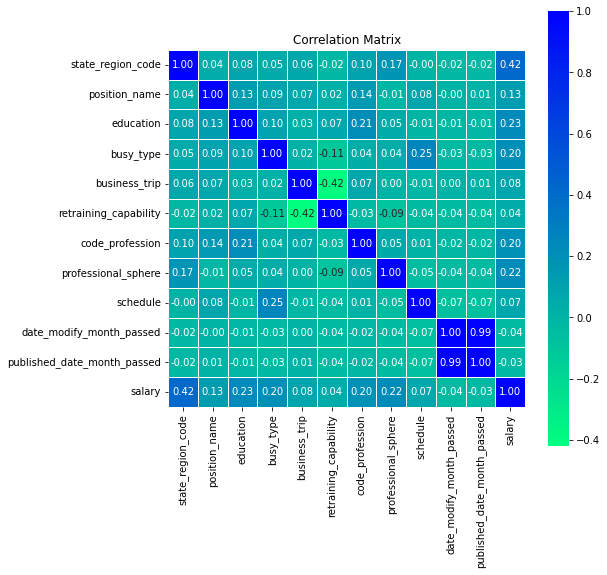

In [613]:
#correlation plot
corr = df[['state_region_code',   
           'position_name', 
           'education',
           'busy_type',
           'business_trip',
           'retraining_capability',
           'code_profession',
           'professional_sphere',
           'schedule',
           'date_modify_month_passed', 
           'published_date_month_passed',
           'salary']].corr()

fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap='winter_r',fmt='.2f',square=True,linewidths=.5,ax=ax)
plt.title('Correlation Matrix')
plt.show()

In [614]:
#remove multicollinearity
df = df.drop(['published_date_month_passed',
              'schedule',
              'retraining_capability',  
              'professional_sphere',
              'position_name',
              'business_trip'], axis=1)
features = df.iloc[:,:-1]
vif(features)

,features,VIF_value
0,state_region_code,66.592129
1,education,29.567560
2,busy_type,40.394049
3,code_profession,116.852812
4,experience,1.597006
5,fullness_rate,1.370452
6,workExperienceList_cnt,1.670295
7,language_cnt,1.171780
8,date_create_month_passed,1.636764
9,date_modify_month_passed,1.412619


### Findings:
* In this section I have encoded categorical variables using target encoding;
* I also scaled the data for further modelling;
* And finaly I removed multicollinearity from the data. There were several highly correlated features, so I dropped some of them.

In [615]:
#handle outliers
df_cleaned = df.copy()

def outliers(df, col): 
    q1 = df[col].quantile(0.05) 
    q3 = df[col].quantile(0.95)
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    ls = df.index[(df[col]<lower)|(df[col]>upper)]
    return ls

index_list = []
for col in list(df_cleaned.columns):
    index_list.extend(outliers(df_cleaned, col))

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

df_cleaned = remove(df_cleaned, index_list)
print(f' Shape of the dataset without outliers: {df_cleaned.shape},\n Shape of the dataset with presence of outliers: {df.shape}')

 Shape of the dataset without outliers: (369, 12),
 Shape of the dataset with presence of outliers: (425, 12)


### Findings:
* After removing outliers I got 369 observations comparing with 425 before handling outliers;
* Removing outliers may lead to worse model quality - so, I'll do modelling based on both datasets.

## Exploratory Data Analysis (EDA)

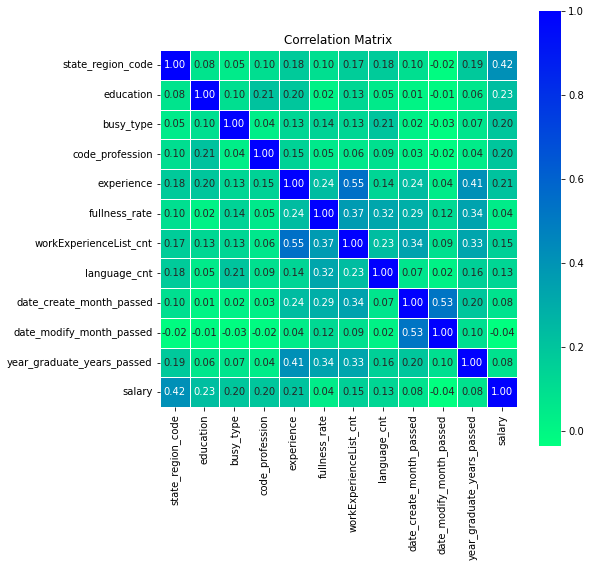

,state_region_code,education,busy_type,code_profession,experience,fullness_rate,workExperienceList_cnt,language_cnt,date_create_month_passed,date_modify_month_passed,year_graduate_years_passed,salary
state_region_code,1.000000,0.075563,0.046878,0.100729,0.179156,0.096209,0.167527,0.176799,0.097738,-0.021362,0.186319,0.416597
education,0.075563,1.000000,0.096626,0.212508,0.196435,0.018932,0.126292,0.052641,0.009640,-0.013288,0.064651,0.229480
busy_type,0.046878,0.096626,1.000000,0.035517,0.133152,0.144812,0.131054,0.205149,0.024892,-0.027296,0.072543,0.198208
code_profession,0.100729,0.212508,0.035517,1.000000,0.146788,0.054210,0.064036,0.091405,0.027030,-0.016955,0.043280,0.195299
experience,0.179156,0.196435,0.133152,0.146788,1.000000,0.238599,0.546124,0.135477,0.238067,0.042086,0.414998,0.207318
fullness_rate,0.096209,0.018932,0.144812,0.054210,0.238599,1.000000,0.368917,0.324870,0.288285,0.120990,0.338809,0.043084
workExperienceList_cnt,0.167527,0.126292,0.131054,0.064036,0.546124,0.368917,1.000000,0.233362,0.340798,0.091788,0.332140,0.154622
language_cnt,0.176799,0.052641,0.205149,0.091405,0.135477,0.324870,0.233362,1.000000,0.072976,0.019045,0.156154,0.130441
date_create_month_passed,0.097738,0.009640,0.024892,0.027030,0.238067,0.288285,0.340798,0.072976,1.000000,0.526577,0.197093,0.078172
date_modify_month_passed,-0.021362,-0.013288,-0.027296,-0.016955,0.042086,0.120990,0.091788,0.019045,0.526577,1.000000,0.095993,-0.035680


In [616]:
#correlation analysis
corr = df.corr()
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap='winter_r',fmt='.2f',square=True,linewidths=.5,ax=ax)
plt.title('Correlation Matrix')
plt.show()

corr

In [617]:
df = df.drop('date_modify_month_passed', axis=1)
df_cleaned = df_cleaned.drop('date_modify_month_passed', axis=1)
print(f' Shape of the dataset without outliers: {df_cleaned.shape},\n Shape of the dataset with presence of outliers: {df.shape}')

 Shape of the dataset without outliers: (369, 11),
 Shape of the dataset with presence of outliers: (425, 11)


### Findings:
* There were high correlation between *date_create_month_passed* and *date_modify_month_passed*, so I dropped the last one;
* There were also some high correlations, but baseed on logic I decided not to drop any other variables.

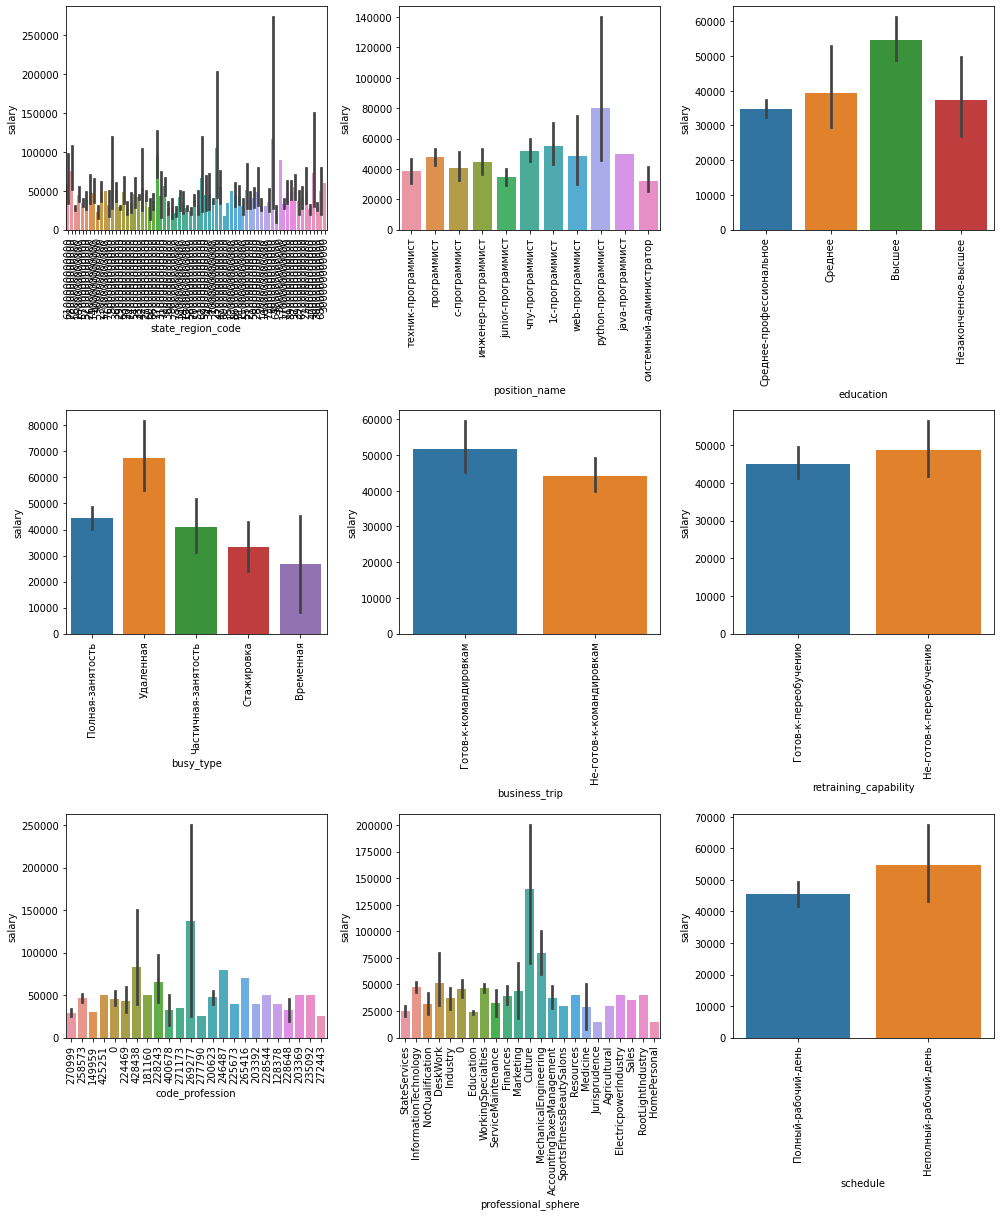

In [621]:
#exploring categorical variables - barplots for each variable
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (14,17))
axs = axs.flatten()

for i, var in enumerate(cat_col):
    sns.barplot(x = var, y = 'salary', data = data1, ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
    
fig.tight_layout()
plt.show()

### Findings:
* Based on these graphs it's possible to make some conclusions about the specifics of factor dependace of the salary variable - there are highlighting categories within some factors - categories with significantly high or low salary;
* In binary factors values of the target variable (salary) are approximately equal, by the way - there aren't huge difference.

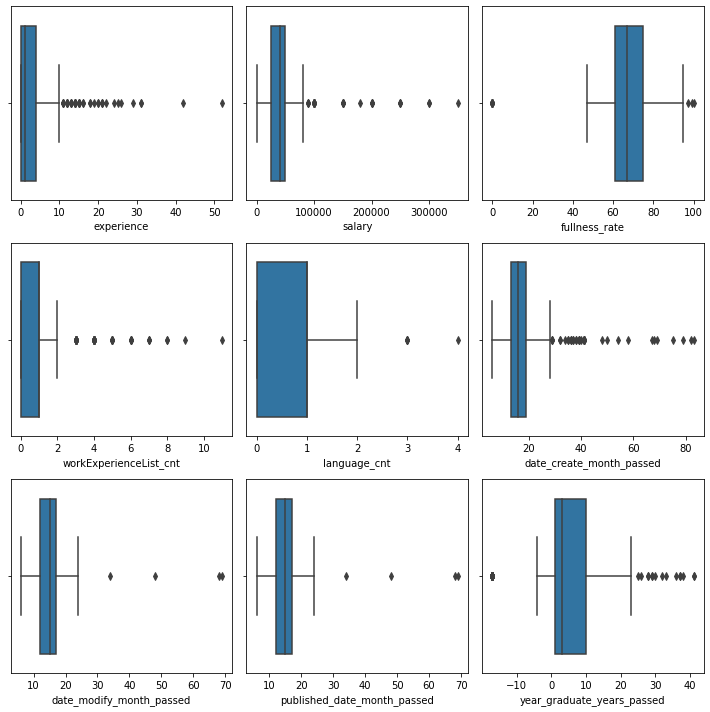

In [622]:
#exploring numerical variables - distribution with boxplots
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10,10))
axs = axs.flatten()

for i, var in enumerate(list(data1.select_dtypes(include=('float', 'int64')))):
    sns.boxplot(x = var, data = data1, ax = axs[i])
    
fig.tight_layout()
plt.show()

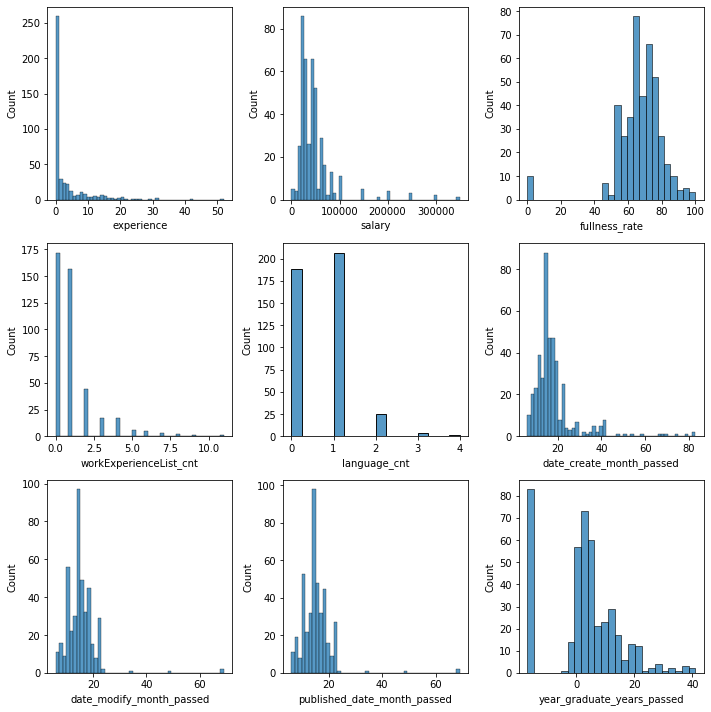

In [623]:
#exploring numerical variables - distribution with histograms
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10,10))
axs = axs.flatten()

for i, var in enumerate(list(data1.select_dtypes(include=('float', 'int64')))):
    sns.histplot(x = var, data = data1, ax = axs[i])
    
fig.tight_layout()
plt.show()

### Findings:
* Distributions of numerical factors are not normal, in general;
* There are outliers in the data - anyway in dataset for further modelling these outliers are already deleted;
* Distributions of most of factros are right skewed and have significant kurtosis.

## Model development and validation
* In this section I'm building some regression models, validating them and comparing with each other in order to find the one with the best quality metrics.

### Dataset without oultiers

In [624]:
df_cleaned.head()

,state_region_code,education,busy_type,code_profession,experience,fullness_rate,workExperienceList_cnt,language_cnt,date_create_month_passed,year_graduate_years_passed,salary
1,61802.137219,39753.722892,44262.133929,46169.090909,1.730744,0.147235,1.205574,-0.977209,0.453539,1.910600,30000
2,43477.552452,39753.722892,66579.069740,46169.090909,-0.533034,0.426588,-0.085028,2.065382,-0.392698,-1.628086,25000
3,45899.908653,54691.372878,44262.133929,46169.090909,-0.533034,-0.970176,-0.730329,-0.977209,-0.768803,-1.628086,39157
4,44805.926539,34797.504042,43983.858543,44289.564815,-0.533034,0.286912,-0.730329,-0.977209,-0.204646,0.017814,30000
5,44266.820583,54691.372878,66579.069740,46169.090909,1.892442,0.775779,1.850874,0.544087,-0.204646,1.005354,60000


In [625]:
#train test split
data_model = df_cleaned.copy()
target = data_model['salary']
data_model = data_model.drop(['salary'], axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(data_model, target, test_size=0.2,random_state=123)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(295, 10) (74, 10) (295,) (74,)


In [626]:
#modelling with - gridsearch of hyperparameters (finding the best parameters)
cv = KFold(n_splits = 5, shuffle = True, random_state = 314)

#hyperparameters
Lasso_param_grid = {'alpha':np.linspace(0.01,5,40)}

Ridge_param_grid = {'alpha':[.1,.3,.5,1,2,3,4,5,10],
                    'solver':['auto', 'svd', 'lsqr']}

RFR_param_grid  = {'n_estimators': [5,10,15,20,30,50,60,70,100], 
                   'max_depth': [2,4], 
                   'max_features': ['auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2,4,6,8], 
                   'min_samples_leaf': [1,2,3,4]}

DTR_param_grid = {'max_depth': [2,4], 
                  'max_features': ['auto', 'sqrt', 'log2'], 
                  'min_samples_split': [2,4,6,8], 
                  'min_samples_leaf': [1,2,3,4]}

#models
Lasso = linear_model.Lasso()
Ridge = linear_model.Ridge()
RFR = RandomForestRegressor()
DTR = DecisionTreeRegressor()

grids = [Lasso_param_grid, Ridge_param_grid, RFR_param_grid, DTR_param_grid]
models = [Lasso, Ridge, RFR, DTR]
names = ['Lasso', 'Ridge', 'RandomForestRegressor', 'DecisionTreeRegressor']

#fitting
for model,grid,name in zip(models, grids, names):
    grid_search = GridSearchCV(model, param_grid = grid, cv = cv, scoring = 'r2')
    grid_search.fit(X_train,Y_train)
    score = grid_search.best_score_
    params_res = grid_search.best_params_
    print(f' {name},\n {score},\n {params_res} \n')
    y_pred = grid_search.best_estimator_.predict(X_test)
    print(f'Train Performance\n R2 score: {round(metrics.r2_score(Y_train, grid_search.best_estimator_.predict(X_train)),3)}, MSE: {round(metrics.mean_squared_error(Y_train, grid_search.best_estimator_.predict(X_train)),3)}, RMSE: {round(math.sqrt(metrics.mean_squared_error(Y_train, grid_search.best_estimator_.predict(X_train))),3)}')
    print(f'Test Performance\n R2 score: {round(metrics.r2_score(Y_test, y_pred),3)}, MSE: {round(metrics.mean_squared_error(Y_test, y_pred),3)}, RMSE: {round(math.sqrt(metrics.mean_squared_error(Y_test, y_pred)),3)} \n -------------------- \n')

 Lasso,
 0.2025225203716296,
 {'alpha': 5.0} 

Train Performance
 R2 score: 0.284, MSE: 545827622.788, RMSE: 23362.954
Test Performance
 R2 score: 0.349, MSE: 511912707.531, RMSE: 22625.488 
 -------------------- 

 Ridge,
 0.21034934977782394,
 {'alpha': 10, 'solver': 'lsqr'} 

Train Performance
 R2 score: 0.259, MSE: 564849992.352, RMSE: 23766.573
Test Performance
 R2 score: 0.339, MSE: 520310602.937, RMSE: 22810.318 
 -------------------- 

 RandomForestRegressor,
 0.2786017477934905,
 {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 50} 

Train Performance
 R2 score: 0.484, MSE: 393517875.176, RMSE: 19837.285
Test Performance
 R2 score: 0.342, MSE: 517817409.49, RMSE: 22755.602 
 -------------------- 

 DecisionTreeRegressor,
 0.12875015899421527,
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2} 

Train Performance
 R2 score: 0.372, MSE: 479251431.594, RMSE: 21891.812
Test Performance
 R2

### Findings:
* All models performe relatively bad quality;
* The last model performes obvious overfitting, since quality on train and test data is significantly different;
* Best model is the one based on random forest regressor.

### Dataset with oultiers

In [627]:
#train test split
data_model = df.copy()
target = data_model['salary']
data_model = data_model.drop(['salary'], axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(data_model, target, test_size=0.2,random_state=123)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(340, 10) (85, 10) (340,) (85,)


In [628]:
#modelling with - gridsearch of hyperparameters (finding the best parameters)
cv = KFold(n_splits = 5, shuffle = True, random_state = 314)

#hyperparameters
Lasso_param_grid = {'alpha':np.linspace(0.01,5,40)}

Ridge_param_grid = {'alpha':[.1,.3,.5,1,2,3,4,5,10],
                    'solver':['auto', 'svd', 'lsqr']}

RFR_param_grid  = {'n_estimators': [5,10,15,20,30,50,60,70,100], 
                   'max_depth': [2,4], 
                   'max_features': ['auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2,4,6,8], 
                   'min_samples_leaf': [1,2,3,4]}

DTR_param_grid = {'max_depth': [2,4], 
                  'max_features': ['auto', 'sqrt', 'log2'], 
                  'min_samples_split': [2,4,6,8], 
                  'min_samples_leaf': [1,2,3,4]}

#models
Lasso = linear_model.Lasso()
Ridge = linear_model.Ridge()
RFR = RandomForestRegressor()
DTR = DecisionTreeRegressor()

grids = [Lasso_param_grid, Ridge_param_grid, RFR_param_grid, DTR_param_grid]
models = [Lasso, Ridge, RFR, DTR]
names = ['Lasso', 'Ridge', 'RandomForestRegressor', 'DecisionTreeRegressor']

#fitting
for model,grid,name in zip(models, grids, names):
    grid_search = GridSearchCV(model, param_grid = grid, cv = cv, scoring = 'r2')
    grid_search.fit(X_train,Y_train)
    score = grid_search.best_score_
    params_res = grid_search.best_params_
    print(f' {name},\n {score},\n {params_res} \n')
    y_pred = grid_search.best_estimator_.predict(X_test)
    print(f'Train Performance\n R2 score: {round(metrics.r2_score(Y_train, grid_search.best_estimator_.predict(X_train)),3)}, MSE: {round(metrics.mean_squared_error(Y_train, grid_search.best_estimator_.predict(X_train)),3)}, RMSE: {round(math.sqrt(metrics.mean_squared_error(Y_train, grid_search.best_estimator_.predict(X_train))),3)}')
    print(f'Test Performance\n R2 score: {round(metrics.r2_score(Y_test, y_pred),3)}, MSE: {round(metrics.mean_squared_error(Y_test, y_pred),3)}, RMSE: {round(math.sqrt(metrics.mean_squared_error(Y_test, y_pred)),3)} \n -------------------- \n')

 Lasso,
 0.21235362403253882,
 {'alpha': 5.0} 

Train Performance
 R2 score: 0.28, MSE: 1154218931.476, RMSE: 33973.798
Test Performance
 R2 score: 0.121, MSE: 1526842923.586, RMSE: 39074.837 
 -------------------- 

 Ridge,
 0.22681403932469052,
 {'alpha': 10, 'solver': 'lsqr'} 

Train Performance
 R2 score: 0.256, MSE: 1192407544.996, RMSE: 34531.255
Test Performance
 R2 score: 0.212, MSE: 1368853300.121, RMSE: 36998.018 
 -------------------- 

 RandomForestRegressor,
 0.23610819770387606,
 {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 15} 

Train Performance
 R2 score: 0.477, MSE: 838518256.69, RMSE: 28957.18
Test Performance
 R2 score: 0.001, MSE: 1736173023.652, RMSE: 41667.41 
 -------------------- 

 DecisionTreeRegressor,
 0.16065231895656532,
 {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 8} 

Train Performance
 R2 score: 0.361, MSE: 1024137115.621, RMSE: 32002.142
Test Performanc

### Findings:
* All models built on data with outliers are significantly worse than those built on the previous step, based on data without outliers;
* Outliers and noise in data affect model's performance, so now all models have overfitting;
* Tree-based models shows quality even worse than baseline model.

### XGBoost on data without outliers

In [629]:
#train test split
data_model = df_cleaned.copy()
target = data_model['salary']
data_model = data_model.drop(['salary'], axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(data_model, target, test_size=0.2,random_state=456)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(295, 10) (74, 10) (295,) (74,)


In [636]:
#modelling
XGB = xgb.XGBRegressor()

cv = KFold(n_splits = 5, shuffle = True, random_state = 314)

params_grid_XGB = {'n_estimators': range(5,200,10),
                   'gamma': [0.5, 1, 1.5, 2, 5],
                   'max_depth': [3, 4, 5]}

grid_search = GridSearchCV(XGB, param_grid = params_grid_XGB, cv = cv, scoring = 'r2')
grid_search.fit(X_train, Y_train)
y_pred = grid_search.best_estimator_.predict(X_test)
print(f'Train Performance\n R2 score: {round(metrics.r2_score(Y_train, grid_search.best_estimator_.predict(X_train)),3)}, MSE: {round(metrics.mean_squared_error(Y_train, grid_search.best_estimator_.predict(X_train)),3)}, RMSE: {round(math.sqrt(metrics.mean_squared_error(Y_train, grid_search.best_estimator_.predict(X_train))),3)}')
print(f'Test Performance\n R2 score: {round(metrics.r2_score(Y_test, y_pred),3)}, MSE: {round(metrics.mean_squared_error(Y_test, y_pred),3)}, RMSE: {round(math.sqrt(metrics.mean_squared_error(Y_test, y_pred)),3)} \n -------------------- \n')

Train Performance
 R2 score: 0.424, MSE: 504918103.139, RMSE: 22470.383
Test Performance
 R2 score: 0.144, MSE: 267463259.325, RMSE: 16354.304 
 -------------------- 



### Findings:
* Boosting model performes bad results in terms of quality of metrics;
* This model also shows significant overfitting;
* I guess this is because of small number of observations in the data.

## Feature importance based on the random forest model

In [661]:
#train test split
data_model = df_cleaned.copy()
target = data_model['salary']
data_model = data_model.drop(['salary'], axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(data_model, target, test_size=0.2,random_state=123)

#model
RFR = RandomForestRegressor(max_depth = 4, 
                            max_features = 'auto', 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 50)


RFR.fit(X_train,Y_train)
y_pred = RFR.predict(X_test)
print(f'Train Performance\n R2 score: {round(metrics.r2_score(Y_train, RFR.predict(X_train)),3)}, MSE: {round(metrics.mean_squared_error(Y_train, RFR.predict(X_train)),3)}, RMSE: {round(math.sqrt(metrics.mean_squared_error(Y_train, RFR.predict(X_train))),3)}')
print(f'Test Performance\n R2 score: {round(metrics.r2_score(Y_test, y_pred),3)}, MSE: {round(metrics.mean_squared_error(Y_test, y_pred),3)}, RMSE: {round(math.sqrt(metrics.mean_squared_error(Y_test, y_pred)),3)} \n -------------------- \n')

Train Performance
 R2 score: 0.506, MSE: 376891340.509, RMSE: 19413.69
Test Performance
 R2 score: 0.362, MSE: 501987235.463, RMSE: 22405.072 
 -------------------- 



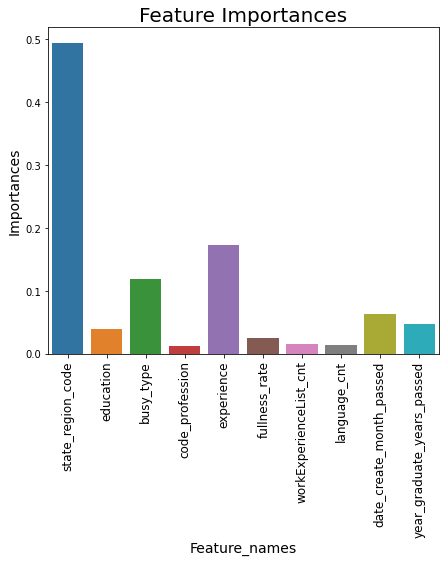

In [697]:
#feature importance
importances_df = pd.DataFrame({"Feature_names" : RFR.feature_names_in_, 
                               "Importances" : RFR.feature_importances_})
                             
#plotting bar chart
fig, ax = plt.subplots(figsize=(7, 6))
g = sns.barplot(x = importances_df["Feature_names"], 
                y = importances_df["Importances"])
g.set_title("Feature Importances", fontsize=20)
g.set_xlabel('Feature_names', fontdict={'size': 14})
g.set_ylabel('Importances', fontdict={'size': 14})
g.set_xticklabels(labels=importances_df["Feature_names"], rotation=90, fontsize=12)
plt.show()

### Findings:
* According to the graph the most important feature is the *state_region_code* - geographical factor corresponding to the region where specialist is looking for a job. So, this is quite obvious that the mean or median salary highly depends on the city you live in. In capital or simply big cities cost of living is higher than in small towns;
* The second most important feature is *professional experience*. So obviously, the more experience you have, the more worthy positions you can apply for and the higher salary you expect. Juniors earn much less the seniors or team leads do;
* Third variable is *busy_type*, corresponding to the full or part time or other types of job. Again, this is also clearly that if you work part time (4 hours a day) you are going to earn less than those who work full time (8 hours a day). In most labour markets the cost of working hour is the salary determinant;
* Variables related to the graduation date and CV creation date are kind of correlated with the *experience* factor. It's also pretty logical - more years of professional experience you have, more years have passed since your graduation as well as since resume creation;
* Surprisingly, *education* is not in the list of the most important variables.